# Image Compress 2

In [20]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [21]:
data = io.imread('./bird_small.png')
data.shape

(128, 128, 3)

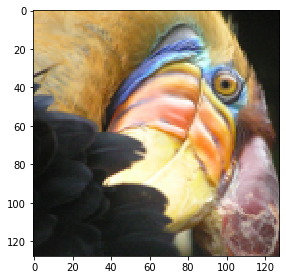

In [22]:
io.imshow(data)

 # Serialize image

In [23]:
X = data.reshape(data.shape[0] * data.shape[1], data.shape[2]) / 255
X.shape

(16384, 3)

# Import k-means implementation from sklern

- n_init: the number of random initialisations. Will select the best model from these initialisations.
- n_jobs: -1 denotes that using all processors to computer n_init.

In [24]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=16, n_jobs=-1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
centroids = km.cluster_centers_
c_indices = km.predict(X)
centroids.shape, c_indices.shape

((16, 3), (16384,))

In [28]:
compressed_img = centroids[c_indices].reshape(data.shape)

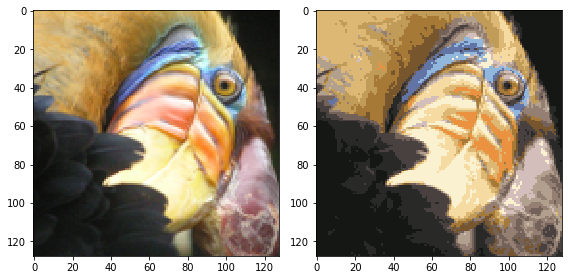

In [31]:
plt.subplots(figsize=(8,8))
plt.subplot(121)
io.imshow(data)
plt.subplot(122)
io.imshow(compressed_img)